# Belajar EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier






In [2]:
df = pd.read_csv('data/titanic.csv', index_col='PassengerId')
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


c:\Users\kobolt10\.conda\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kobolt10\.conda\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kobolt10\.conda\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='Fare', ylabel='Density'>

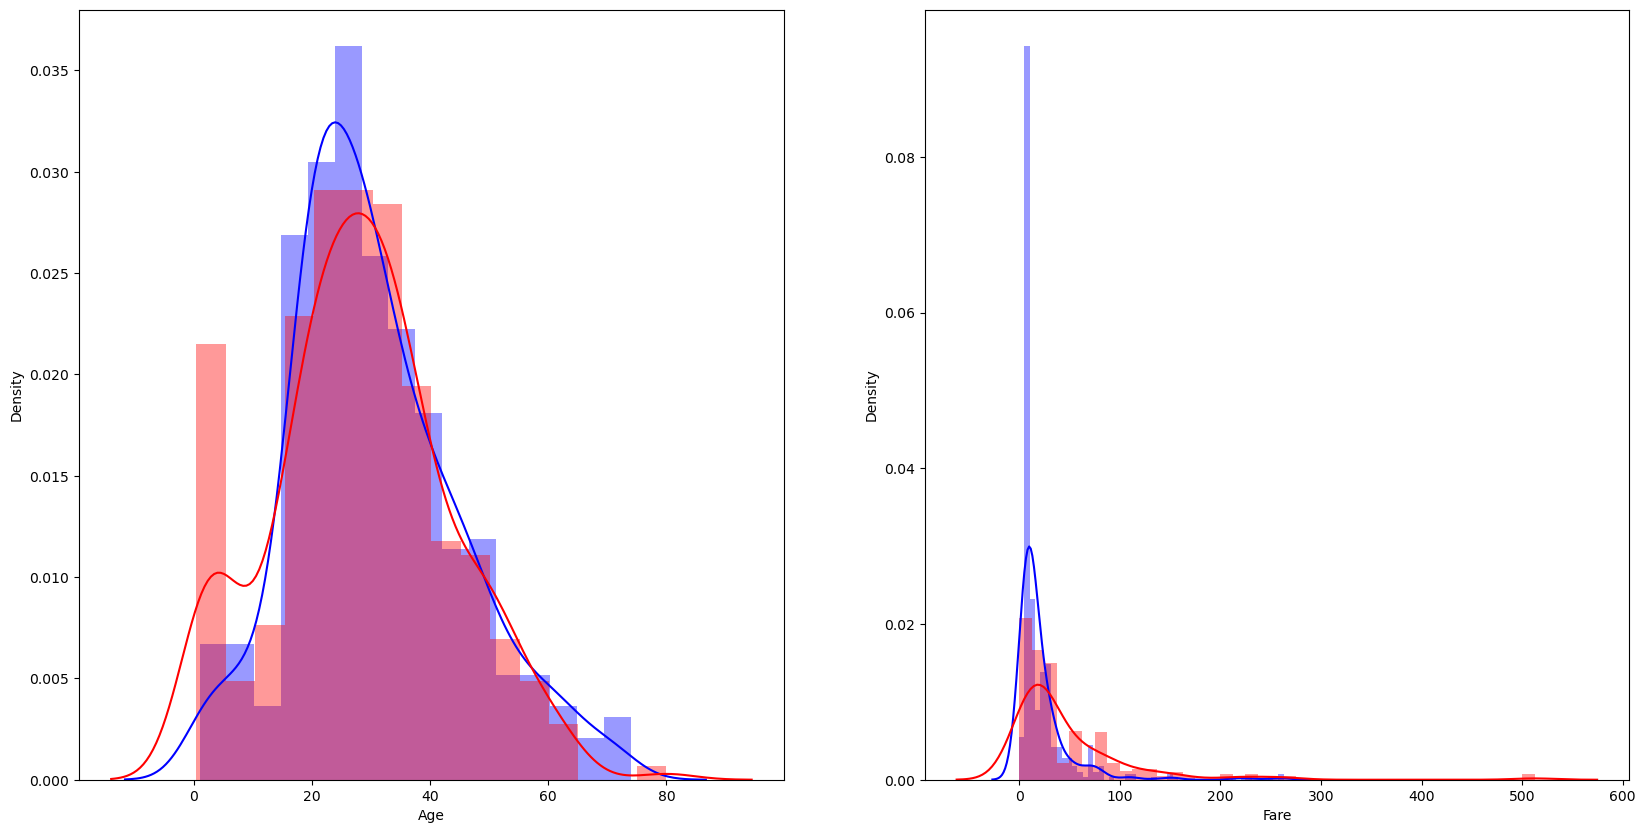

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.distplot(df.Age[df.Survived == 0], ax=ax[0], color='blue')
sns.distplot(df.Age[df.Survived == 1], ax=ax[0], color='red')

sns.distplot(df.Fare[df.Survived == 0], ax=ax[1], color='blue')
sns.distplot(df.Fare[df.Survived == 1], ax=ax[1], color='red')


In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


c:\Users\kobolt10\.conda\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\kobolt10\.conda\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\kobolt10\.conda\envs\jcopml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

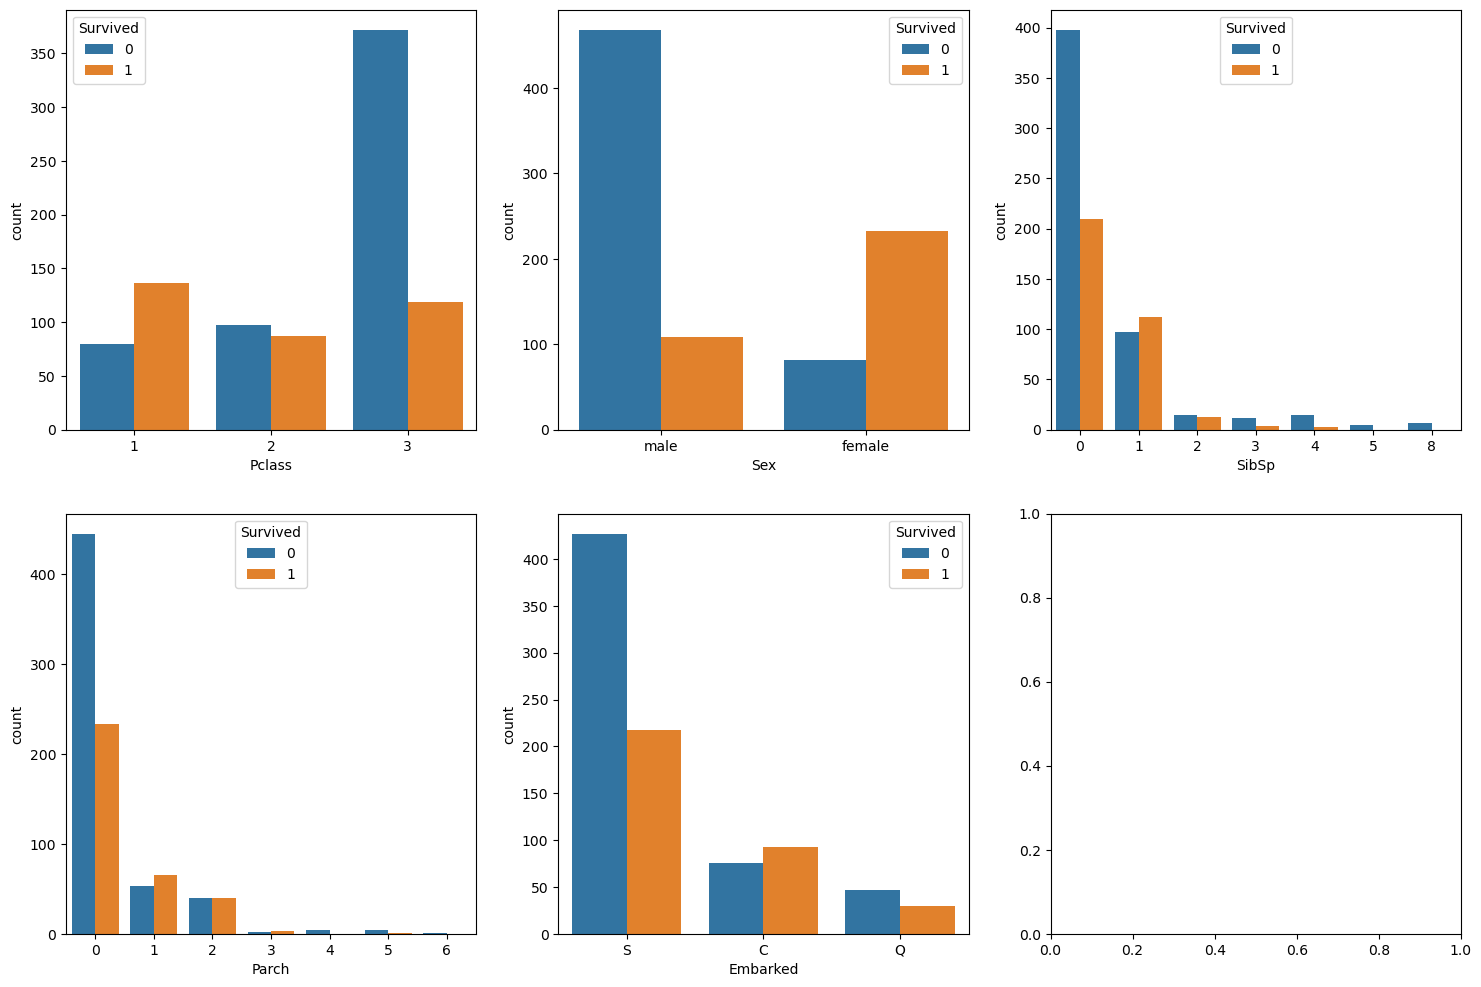

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

variabel = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for variable, subplot in zip(variabel, ax.flatten()):
    sns.countplot(df[variable], hue=df.Survived, ax=subplot)


In [7]:
df.pivot_table(index=df.Embarked, columns=df.Pclass, values='Embarked', aggfunc='count')

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [8]:
df.pivot_table(index=df.Embarked, columns=df.Sex, values='Embarked', aggfunc='count')

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


In [9]:
df.pivot_table(index=df.Pclass, columns=df.Sex, values='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [11]:
df['isalone'] = np.where((df.SibSp + df.Parch) > 0, 0, 1)

In [22]:
df.Age = pd.cut(df.Age, bins=[0, 12, 18, 65, 100], labels=['child', 'teenager', 'adult', 'elder'])

In [25]:
df.Fare = pd.cut(df.Fare, bins=[0, 7.91, 14.45, 31, 120, df.Fare.max()], labels=['low_price', 'medium_price', 'high_price', 'very_high_price', 'extreme_price'])


In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isalone
PassengerId,,,,,,,,,
1,0,3,male,adult,1,0,low_price,S,0
2,1,1,female,adult,1,0,very_high_price,C,0
3,1,3,female,adult,0,0,medium_price,S,1
4,1,1,female,adult,1,0,very_high_price,S,0
5,0,3,male,adult,0,0,medium_price,S,1


In [27]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [31]:
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp

In [33]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='minmax'), ['SibSp', 'Parch']),
    ('categorical', cat_pipe(encoder='onehot'), ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'isalone'])
])

In [37]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)

model.fit(x_train, y_train)
model.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'algo__n_neighbors': 5, 'algo__p': 1.5, 'algo__weights': 'uniform'}

In [38]:
model.predict(x_test)
model.score(x_test, y_test)

0.7988826815642458